In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import netCDF4
from netCDF4 import Dataset
from scipy.interpolate import griddata

In [2]:
import matplotlib as mpl
mpl.rc('image', cmap='turbo')

# Extracting the SSH values from the files

In [3]:
os.chdir('F:')

In [4]:
cycles_saral = os.listdir('saral_f_ssh_40')

In [5]:
nc_saral = Dataset('saral_f_ssh_40//003//003_0010ssh.40.nc')

In [6]:
nc_saral

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    institution: DGFI-TUM
    source: Open Altimeter Database (OpenADB)
    mission: saral
    long_mission: SARAL
    cycle: 003
    pass_number: 0010
    ellipsoid: topex
    ellipsoid_axis: 6378136.3
    ellipsoid_flattening: 0.0033528131778969
    first_meas_time: 2013-05-23 13:35:14
    last_meas_time: 2013-05-23 13:39:26
    creation_date: 2023-04-10 09:29:04
    dimensions(sizes): time(244)
    variables(dimensions): float64 jday.00(time), float64 glon.00(time), float64 glat.00(time), float32 ssh.40(time), uint8 sflag.40(time), uint8 oflags.00(time), uint8 iflags.00(time)
    groups: 

In [7]:
nc_saral.variables

{'jday.00': <class 'netCDF4._netCDF4.Variable'>
 float64 jday.00(time)
     units: d
     standard_name: Julian day epoch 2000.0 (2000-01-01 12:00:00 UTC)
     nan: 0
     valid_range: [4891.06614 4891.06906]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'glon.00': <class 'netCDF4._netCDF4.Variable'>
 float64 glon.00(time)
     units: deg
     source: SGDR-F // lon
     standard_name: Longitude
     nan: 0
     valid_range: [64.781075 68.072386]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'glat.00': <class 'netCDF4._netCDF4.Variable'>
 float64 glat.00(time)
     units: deg
     source: SGDR-F // lon
     standard_name: Latitude
     nan: 0
     valid_range: [-9.971415  4.956497]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'ssh.40': <class 'netCDF4._netCDF4.Variable'>
 float32 ssh.40(time

In [8]:
# Extracthing files from saral
df_saral = pd.DataFrame(columns=['cycle', 'pass','lat', 'lon', 'ssh'])
for c in cycles_saral:
    files = os.listdir('saral_f_ssh_40//' + c)
    for f in files:
        nc = Dataset('saral_f_ssh_40//' + c + '//' + f, 'r')
        lat = nc['glat.00'][:]
        lon = nc['glon.00'][:]
        ssh = nc['ssh.40'][:]
        cycle = np.int32(nc.cycle) * np.ones(len(lat))
        pass_number = np.int32(nc.pass_number) * np.ones(len(lat))
        new_df = pd.DataFrame(np.array([cycle, pass_number, lat, lon, ssh]).T, columns=df_saral.columns)

        df_saral = pd.concat([df_saral, new_df], ignore_index=True)
        

In [9]:
df_saral.head()

cycle  pass       lat        lon        ssh
0   3.0  10.0  4.956497  68.072386 -86.468002
1   3.0  10.0  4.895148  68.058863    -86.417
2   3.0  10.0  4.833761  68.045334    -86.348
3   3.0  10.0   4.77238  68.031807 -86.279999
4   3.0  10.0  4.710998  68.018283    -86.152

In [10]:
df_saral.describe().T

count    unique         top    freq
cycle  321107.0      33.0   15.000000  9988.0
pass   321107.0      51.0  225.000000  8037.0
lat    321107.0  317627.0    0.906800     3.0
lon    321107.0  317755.0   65.808591     3.0
ssh    321107.0   55664.0  -62.612999    29.0

In [11]:
df_saral.to_csv('saral_f_ssh40.csv', index=False)

In [12]:
nc_jason = Dataset('jason2_ssh_40\\181\\181_0003ssh.40.nc')

In [13]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    institution: DGFI-TUM
    source: Open Altimeter Database (OpenADB)
    mission: saral
    long_mission: SARAL
    cycle: 035
    pass_number: 0511
    ellipsoid: topex
    ellipsoid_axis: 6378136.3
    ellipsoid_flattening: 0.0033528131778969
    first_meas_time: 2016-07-04 01:31:09
    last_meas_time: 2016-07-04 01:35:21
    creation_date: 2023-04-10 09:29:53
    dimensions(sizes): time(244)
    variables(dimensions): float64 jday.00(time), float64 glon.00(time), float64 glat.00(time), float32 ssh.40(time), uint8 sflag.40(time), uint8 oflags.00(time), uint8 iflags.00(time)
    groups: 

In [14]:
nc.variables

{'jday.00': <class 'netCDF4._netCDF4.Variable'>
 float64 jday.00(time)
     units: d
     standard_name: Julian day epoch 2000.0 (2000-01-01 12:00:00 UTC)
     nan: 0
     valid_range: [6028.56331 6028.56622]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'glon.00': <class 'netCDF4._netCDF4.Variable'>
 float64 glon.00(time)
     units: deg
     source: SGDR-F // lon
     standard_name: Longitude
     nan: 0
     valid_range: [66.029368 69.321809]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'glat.00': <class 'netCDF4._netCDF4.Variable'>
 float64 glat.00(time)
     units: deg
     source: SGDR-F // lon
     standard_name: Latitude
     nan: 0
     valid_range: [-9.954288  4.962643]
 unlimited dimensions: 
 current shape = (244,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'ssh.40': <class 'netCDF4._netCDF4.Variable'>
 float32 ssh.40(time

In [15]:
# Extracting Jason2 Data
cycles_jason = os.listdir('jason2_ssh_40')
df_jason = pd.DataFrame(columns=['cycle', 'pass','lat', 'lon', 'ssh'])
for c in cycles_jason:
    files = os.listdir('jason2_ssh_40//' + c)
    for f in files:
        nc = Dataset('jason2_ssh_40//' + c + '//' + f, 'r')
        lat = nc['glat.00'][:]
        lon = nc['glon.00'][:]
        ssh = nc['ssh.40'][:]
        cycle = np.int32(nc.cycle) * np.ones(len(lat))
        pass_number = np.int32(nc.pass_number) * np.ones(len(lat))
        new_df = pd.DataFrame(np.array([cycle, pass_number, lat, lon, ssh]).T, columns=df_jason.columns)

        df_jason = pd.concat([df_jason, new_df], ignore_index=True)
        

In [16]:
df_jason.head()

cycle pass       lat        lon        ssh
0  181.0  3.0 -9.959971  67.977653 -54.762001
1  181.0  3.0 -9.910107  67.996158 -55.012001
2  181.0  3.0 -9.860242  68.014656 -55.317001
3  181.0  3.0 -9.810375  68.033147 -55.636002
4  181.0  3.0 -9.760506  68.051631 -55.919998

In [17]:
df_jason.describe().T

count    unique         top     freq
cycle  321677.0     114.0  222.000000   3106.0
pass   321677.0      14.0  181.000000  31102.0
lat    321677.0  315207.0   -9.610442      4.0
lon    321677.0  318105.0   71.887464      3.0
ssh    321677.0   53835.0  -65.172997     42.0

In [18]:
df_jason.to_csv('jason2_ssh40.csv', index=False)

# Calculating MSSH along all the passes

In [19]:
# For Saral
df_saral = df_saral.groupby('pass')

In [20]:
saral = pd.DataFrame(columns=['pass', 'lat', 'lon', 'mssh'])
for name, group in df_saral:
    cycle_max = group.groupby('cycle').size().idxmax()
    lat_fixed = group.loc[group['cycle'] == cycle_max, 'lat']
    lon_fixed = group.loc[group['cycle'] == cycle_max, 'lon']
    mssh = np.array(group.loc[group['cycle'] == cycle_max, 'ssh'])
    #print(mssh.shape)
    grouped = group.groupby('cycle')
    for cyc, frame in grouped:
        if cyc == cycle_max:
            continue
        if len(frame['ssh']) < 4:
            continue
        zi = griddata((frame['lon'], frame['lat']), frame['ssh'] , (lon_fixed, lat_fixed), method='linear')
        #print(zi.shape)
        mssh = np.vstack((mssh, zi))
        #print(mssh.shape)
    mssh = np.nanmean(mssh, axis=0)
    pas = name*np.ones(len(lat_fixed))
    new_df = pd.DataFrame(np.array([pas, lat_fixed, lon_fixed, mssh]).T, columns=saral.columns)
    # concatenate the new DataFrame with the original DataFrame
    saral = pd.concat([saral, new_df], ignore_index=True)

In [21]:
saral.head()

pass       lat        lon       mssh
0  10.0  4.984089  68.076225 -86.459999
1  10.0   4.92276  68.062685    -86.402
2  10.0  4.861431  68.049147 -86.328003
3  10.0  4.800102   68.03561 -86.271004
4  10.0  4.738773  68.022075 -86.156998

In [22]:
saral.describe().T

count   unique        top   freq
pass  10171.0     51.0  10.000000  245.0
lat   10171.0  10167.0   1.740849    2.0
lon   10171.0  10169.0  71.210132    2.0
mssh  10171.0  10013.0 -62.023998    3.0

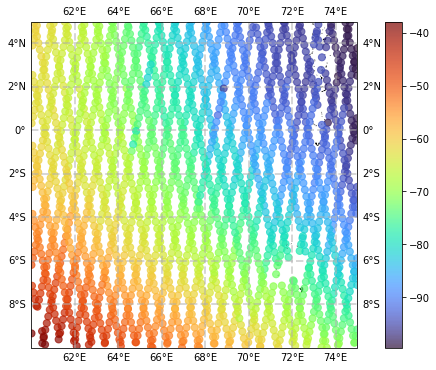

In [23]:
# Plotting the Saral mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(saral['lon'][::5], saral['lat'][::5], c=saral['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

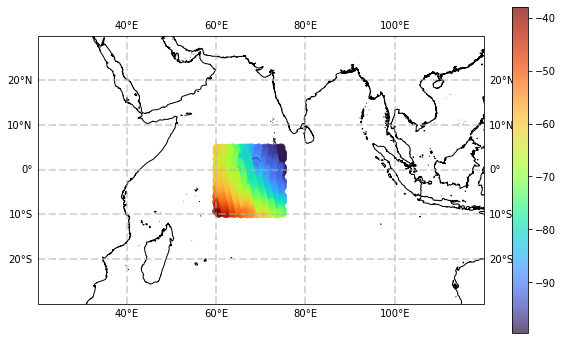

In [24]:
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(saral['lon'][::5], saral['lat'][::5], c=saral['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([20, 120,-30, 30], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [25]:
saral.to_csv('saral_mssh40.csv', index=False)

In [26]:
# For Jason
df_jason = df_jason.groupby('pass')

In [27]:
jason = pd.DataFrame(columns=['pass', 'lat', 'lon', 'mssh'])
for name, group in df_jason:
    cycle_max = group.groupby('cycle').size().idxmax()
    lat_fixed = group.loc[group['cycle'] == cycle_max, 'lat']
    lon_fixed = group.loc[group['cycle'] == cycle_max, 'lon']
    mssh = np.array(group.loc[group['cycle'] == cycle_max, 'ssh'])
    #print(mssh.shape)
    grouped = group.groupby('cycle')
    for cyc, frame in grouped:
        if cyc == cycle_max:
            continue
        if len(frame['ssh']) < 4:
            continue
        zi = griddata((frame['lon'], frame['lat']), frame['ssh'] , (lon_fixed, lat_fixed), method='linear')
        #print(zi.shape)
        mssh = np.vstack((mssh, zi))
        #print(mssh.shape)
    mssh = np.nanmean(mssh, axis=0)
    pas = name*np.ones(len(lat_fixed))
    new_df = pd.DataFrame(np.array([pas, lat_fixed, lon_fixed, mssh]).T, columns=jason.columns)
    # concatenate the new DataFrame with the original DataFrame
    jason = pd.concat([jason, new_df], ignore_index=True)

In [28]:
jason.head()

pass       lat        lon       mssh
0  3.0 -9.956293  67.980262 -54.776001
1  3.0 -9.906431  67.998768 -54.967749
2  3.0 -9.856568  68.017267  -55.19133
3  3.0 -9.806703  68.035759  -55.36287
4  3.0 -9.756837  68.054244 -55.576681

In [29]:
jason.describe().T

count  unique        top   freq
pass  3149.0    14.0  16.000000  300.0
lat   3149.0  3149.0  -9.956293    1.0
lon   3149.0  3149.0  67.980262    1.0
mssh  3149.0  3149.0 -54.776001    1.0

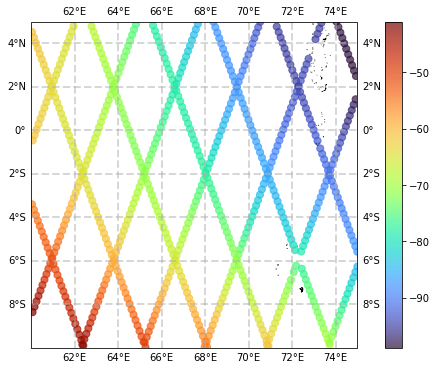

In [30]:
# Plotting the Jason2 mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(jason['lon'][::5], jason['lat'][::5], c=jason['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [31]:
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(jason['lon'][::5], jason['lat'][::5], c=jason['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([20, 120,-30, 30], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [32]:
jason.to_csv('jason_mssh40.csv', index=False)

# Removal of Cross-Over points

In [33]:
# identifying ascending and descending tracks
asc = []
des = []
for name, group in saral.groupby('pass'):
    diff_x = group.iloc[4, 2] - group.iloc[0, 2]
    diff_y = group.iloc[4, 1] - group.iloc[0, 1]
    if np.arctan2(diff_y, diff_x) > np.pi/2:
        des.append(name)
    else:
        asc.append(name)


In [34]:
# ascending tracks saral
saral_asc = saral[saral['pass'].isin(asc)]
# Plotting the Saral mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(saral_asc['lon'][::5], saral_asc['lat'][::5], c=saral_asc['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

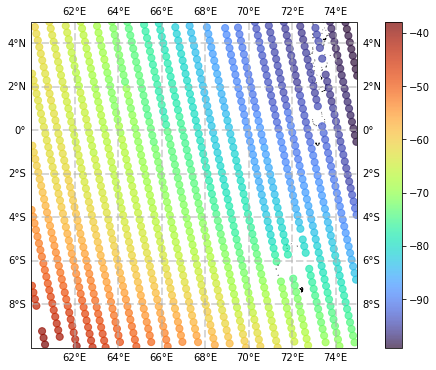

In [35]:
# desenending tracks saral
saral_des = saral[saral['pass'].isin(des)]
# Plotting the Saral mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(saral_des['lon'][::5], saral_des['lat'][::5], c=saral_des['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [36]:
# identifying the ascending and descending tracks of jason
asc_jason = []
des_jason = []
for name, group in jason.groupby('pass'):
    diff_x = group.iloc[4, 2] - group.iloc[3, 2]
    diff_y = group.iloc[4, 1] - group.iloc[3, 1]
    #print(np.arctan2(diff_y, diff_x))
    if np.arctan2(diff_y, diff_x) > 0:
        des_jason.append(name)
    else:
        asc_jason.append(name)


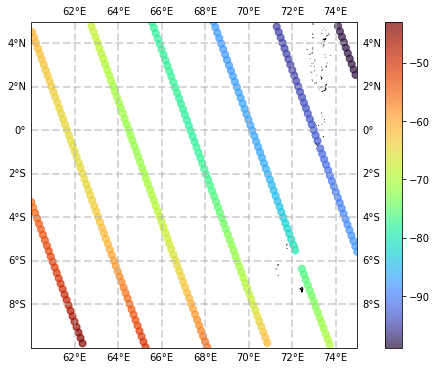

In [37]:
# ascending tracks jason2
jason_des = jason[jason['pass'].isin(asc_jason)]
# Plotting the jason2 mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(jason_des['lon'][::5], jason_des['lat'][::5], c=jason_des['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

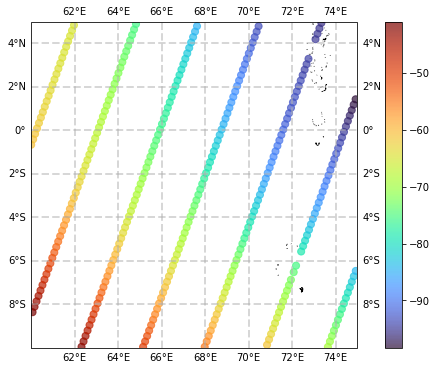

In [38]:
# ascending tracks jason2
jason_asc = jason[jason['pass'].isin(des_jason)]
# Plotting the jason2 mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(jason_asc['lon'][::5], jason_asc['lat'][::5], c=jason_asc['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10,5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [39]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

def find_crossover_points(lat1, lon1, lat2, lon2, threshold):
    print(threshold)
    crossover_points = set()
    for i in range(len(lat1)-1):
        for j in range(i+1 , len(lat2)-1):
            d = haversine(lat1[i], lon1[i], lat2[j], lon2[j])
            
            if d <= threshold:
                print(lat1[i], lon1[i], lat2[j], lon2[j])
                crossover_points.add(j)
    return crossover_points

In [40]:
thresh = 11.1

In [41]:
# combined mssh
combined = pd.concat([saral, jason], ignore_index=True)

In [42]:
combined.head()

pass       lat        lon       mssh
0  10.0  4.984089  68.076225 -86.459999
1  10.0   4.92276  68.062685    -86.402
2  10.0  4.861431  68.049147 -86.328003
3  10.0  4.800102   68.03561 -86.271004
4  10.0  4.738773  68.022075 -86.156998

In [43]:
combined.describe().T

count   unique         top   freq
pass  13320.0     65.0  194.000000  300.0
lat   13320.0  13314.0    3.580317    2.0
lon   13320.0  13318.0   74.122049    2.0
mssh  13320.0  13162.0  -62.023998    3.0

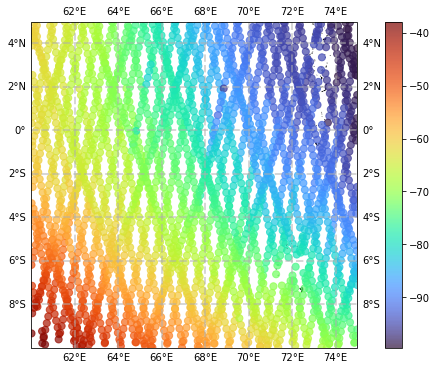

In [44]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(combined['lon'][::5], combined['lat'][::5], c=combined['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

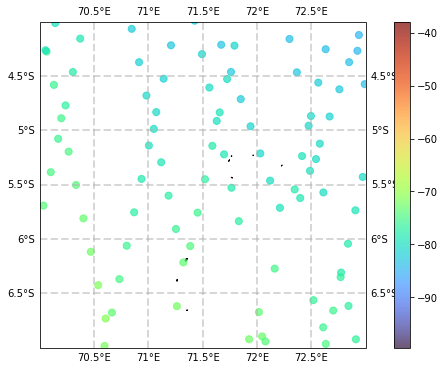

In [45]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(combined['lon'][::5], combined['lat'][::5], c=combined['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([70, 73,-7,-4], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [46]:
indices = find_crossover_points(combined['lat'], combined['lon'], combined['lat'], combined['lon'], 2.9)

11.1
4.922759999999999 68.062685 4.9261 68.03904899999999
4.861431 68.04914699999999 4.864801 68.052587
3.1441879999999998 67.670681 3.1485019999999997 67.650611
3.0828569999999997 67.657183 3.08717 67.664107
1.610919 67.333501 1.616758 67.315125
1.5495889999999999 67.32002299999999 1.5554 67.328588
0.6293179999999999 67.11784 0.621935 67.104597
0.5679569999999999 67.104362 0.571904 67.122436
-0.045638 66.96958699999999 -0.041509 66.965144
-0.106996 66.95611 -0.102868 66.978636
-1.5795519999999998 66.632607 -1.579645 66.60881599999999
-1.6409369999999999 66.619117 -1.6409989999999999 66.622299
-3.298237 66.2546 -3.29432 66.242406
-3.3596139999999997 66.241086 -3.355702 66.255917
-4.341805 66.024659 -4.316945 66.031663
-4.955813 65.889166 -4.940462999999999 65.891136
-6.552299 65.53598699999999 -6.556178 65.52475799999999
-6.613716999999999 65.52237099999999 -6.617596 65.538354
-8.149116 65.181144 -8.13979 65.16297999999999
-8.210550999999999 65.16745399999999 -8.201229 65.176649
-9.132

-7.965007999999999 62.353435999999995 -7.9462079999999995 62.370013
-9.071686 62.106894 -9.096411999999999 62.102835999999996
-9.502070999999999 62.010732999999995 -9.486452 61.995742
-9.563574 61.996978 -9.547903999999999 62.009502999999995
4.195068 73.058275 4.190144 73.075484
4.133688 73.044749 4.140142 73.057532
2.9674679999999998 72.787998 2.9503109999999997 72.777637
2.906087 72.774497 2.888976 72.791131
1.494344 72.464195 1.470354 72.472942
-0.34786 72.059646 -0.33885 72.060402
-1.6988679999999998 71.76292099999999 -1.7049489999999998 71.75871
-1.760303 71.749423 -1.766309 71.772194
-3.418922 71.384686 -3.4123509999999997 71.38367699999999
-3.603199 71.344115 -3.6229169999999997 71.345171
-6.7986379999999995 70.63826 -6.792005 70.620808
-6.860103 70.624628 -6.853390999999999 70.634433
-8.273837 70.310357 -8.277315999999999 70.305015
-8.581247 70.24181899999999 -8.575304 70.235671
-8.642726999999999 70.22810299999999 -8.636735 70.249378
-9.798432 65.533103 -9.813016 65.536846
-9.

-0.029814999999999998 60.623439999999995 -0.025377999999999998 60.632949999999994
0.644861 60.47526 0.638671 60.463832
1.50356 60.286621 1.4921529999999998 60.274777
1.5648959999999998 60.273143999999995 1.553534 60.288261
-9.926883 70.538007 -9.936421 70.52299599999999
-9.865433999999999 70.524225 -9.874953 70.536783
-7.469576 69.989462 -7.478492999999999 70.01292099999999
-7.3467519999999995 69.962169 -7.328677 69.958303
-7.28534 69.948527 -7.278734999999999 69.940107
-7.223927 69.934887 -7.228793 69.921916
-7.162514 69.92125 -7.178849 69.90373
-6.732603999999999 69.825856 -6.73649 69.80429
-6.671186 69.812237 -6.675047999999999 69.817897
-5.627141 69.581086 -5.612895 69.5685
-5.565746 69.567512 -5.562918 69.586545
-3.478243 69.107028 -3.476028 69.096884
-3.4168659999999997 69.093514 -3.414622 69.110404
-0.716356 68.499836 -0.712591 68.490568
-0.654998 68.48635999999999 -0.6625639999999999 68.508406
-0.225486 68.392032 -0.223665 68.380892
-0.164126 68.378557 -0.162261 68.394382999999

3.081422 63.406178999999995 3.0866879999999997 63.386945
3.1427519999999998 63.392700999999995 3.1367059999999998 63.369043
4.553332999999999 63.082364999999996 4.544283 63.077602999999996
4.614661 63.068855 4.605659999999999 63.091142999999995
-9.735555999999999 74.135801 -9.748061 74.132089
-9.059572 73.984708 -9.060438999999999 73.978169
-4.206696 72.909851 -4.222753 72.901229
0.70449 71.831577 0.688851 71.82370499999999
1.563526 71.64312699999999 1.554436 71.62754
1.6248859999999998 71.629663 1.615823 71.64101
4.815003 70.928386 4.807869999999999 70.918487
4.8763309999999995 70.914869 4.869196 70.93202099999999
2.484559 63.934098 2.487565 63.959275999999996
2.423203 63.920606 2.437545 63.941401
2.361847 63.907114 2.337503 63.905656
2.3004919999999998 63.893623 2.287481 63.887784999999994
2.239136 63.880132999999994 2.237459 63.869916999999994
2.177781 63.866642999999996 2.187437 63.85205
1.932359 63.812692999999996 1.93617 63.798179
1.871004 63.799206999999996 1.886143 63.816039999

In [47]:
len(list(indices))

652

In [48]:
up = combined.drop(list(indices))

In [49]:
up.describe().T

count   unique        top   freq
pass  12668.0     65.0  16.000000  271.0
lat   12668.0  12662.0   3.580317    2.0
lon   12668.0  12666.0  74.122049    2.0
mssh  12668.0  12518.0 -98.509003    3.0

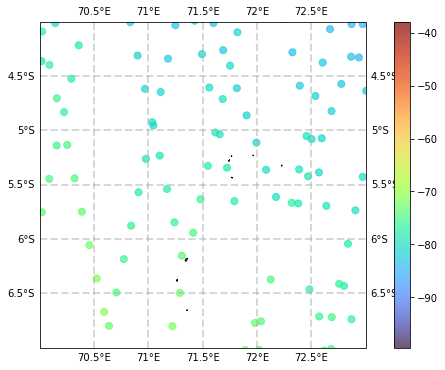

In [50]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(up['lon'][::5], up['lat'][::5], c=up['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([70, 73,-7,-4], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

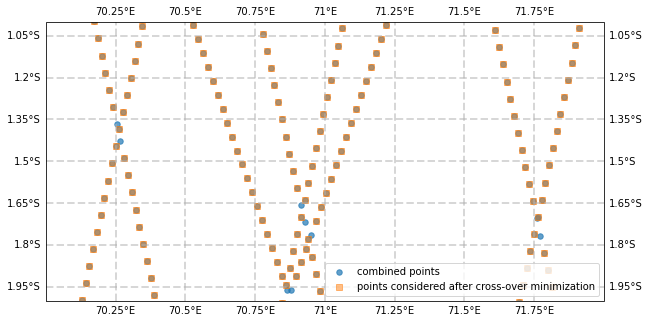

In [51]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(combined['lon'], combined['lat'], marker='o', s=30, alpha=0.7, label='combined points')
plt.scatter(up['lon'], up['lat'], marker='s', s=30, alpha=0.5, label='points considered after cross-over minimization')
ax.set_extent([70, 72,-2,-1], crs= ccrs.PlateCarree())
#cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.legend()
plt.show()

In [52]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
plt.scatter(up['lon'][::5], up['lat'][::5], c=up['mssh'][::5], marker='o', s=50, alpha=0.7)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

In [53]:
up.to_csv('mssh_combined_crossover_minimization.csv', index=False)

# Grids

In [4]:
def create_grid(lon, lat, values, extent) :
    x = np.arange(extent[0], extent[1], 0.1)
    y = np.arange(extent[2], extent[3], 0.1)
    
    points = np.array([lon, lat]).T
    
    X, Y = np.meshgrid(x, y)
    
    grid = griddata(points, values, (X,Y), method='linear')
    
    return grid, X, Y

In [55]:
mssh , lons, lats = create_grid(up['lon'], up['lat'], up['mssh'], [60, 75, -10, 5])

In [56]:
# Plotting the combined mssh data on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')

plt.contourf(lons, lats, mssh, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.show()

# Conversion to WGS84

In [5]:
mssh = pd.read_csv('mssh_combined_crossover_minimization.csv')

In [6]:
mssh.head()

pass       lat        lon       mssh
0  10.0  4.984089  68.076225 -86.459999
1  10.0  4.922760  68.062685 -86.402000
2  10.0  4.861431  68.049147 -86.328003
3  10.0  4.800102  68.035610 -86.271004
4  10.0  4.738773  68.022075 -86.156998

In [7]:
# converting to wgs84
mssh['mssh'] -= 0.7

In [8]:
mssh.head()

pass       lat        lon       mssh
0  10.0  4.984089  68.076225 -87.159999
1  10.0  4.922760  68.062685 -87.102000
2  10.0  4.861431  68.049147 -87.028003
3  10.0  4.800102  68.035610 -86.971004
4  10.0  4.738773  68.022075 -86.856998

In [9]:
mss = mssh.drop('pass', axis=1)

In [10]:
mss.to_csv('mssh_wgs.csv', index=False)

# MDT Calculation

In [11]:
geoid = pd.read_csv('geoid_grid_updated.txt', sep=',', header=None)
geoid.columns = ['lat', 'lon', 'geoid']
geoid.head()

lat   lon      geoid
0 -15.0  45.0 -24.630480
1 -15.0  45.1 -24.509316
2 -15.0  45.2 -24.326492
3 -15.0  45.3 -24.087526
4 -15.0  45.4 -23.800440

In [12]:
geoid.describe().T

count       mean        std         min        25%        50%  \
lat    158301.0   7.500000  13.019258  -15.000000  -3.800000   7.500000   
lon    158301.0  62.500000  10.132488   45.000000  53.700000  62.500000   
geoid  158301.0 -54.010881  24.065287 -106.250468 -71.698601 -51.456543   

             75%        max  
lat    18.800000  30.000000  
lon    71.300000  80.000000  
geoid -34.950472  -0.167739

In [13]:
geoid_grid, lons, lats = create_grid(geoid['lon'], geoid['lat'], geoid['geoid'], [60, 75, -10, 5])

In [14]:
# Plotting the geoid on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')

plt.contourf(lons, lats, geoid_grid, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('Geoid Undulation (m)')
plt.show()

In [15]:
mss_grid, lons, lats =  create_grid(mssh['lon'], mssh['lat'], mssh['mssh'], [60, 75, -10, 5])

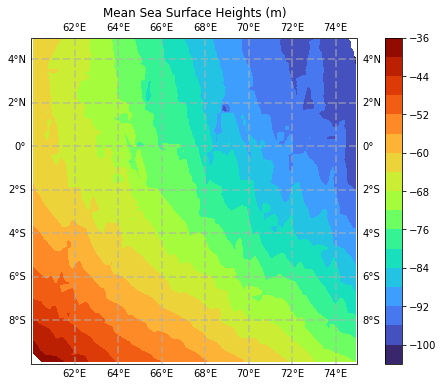

In [16]:
# Plotting the mss on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')

plt.contourf(lons, lats, mss_grid, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('Mean Sea Surface Heights (m)')
plt.show()

In [17]:
# MDT calculation
mdt_grid = mss_grid - geoid_grid

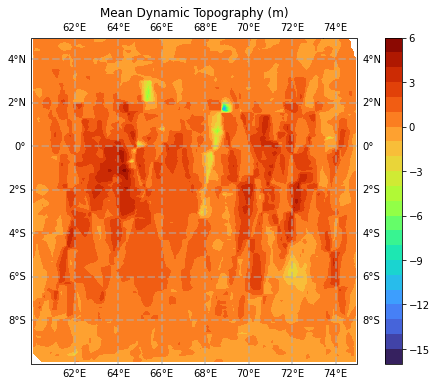

In [18]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')

plt.contourf(lons, lats, mdt_grid, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('Mean Dynamic Topography (m)')
plt.show()

# Anisotropic filtering of MDT

In [19]:
def anisodiff(image,niter=1,kappa=0.16,gamma=0.25,step=(1,1)):
    # ...you could always diffuse each color channel independently if you
    # really want
    img = image.copy()
    mask = np.isnan(image)
    img[mask==True] = 0
    if img.ndim == 3:
        warnings.warn("Only grayscale images allowed, converting to 2D matrix")
        img = img.mean(2)

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    for ii in np.arange(1,niter):
        # calculate the diffs i.e. gradients
        deltaS[:-1,: ] = np.diff(imgout,axis=0)
        deltaE[: ,:-1] = np.diff(imgout,axis=1)
        deltaSf=deltaS;
        deltaEf=deltaE;

        # conduction gradients (only need to compute one per dim!)
        DS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
        DE = 1./(1.+(deltaEf/kappa)**2.)/step[1]

        # update matrices
        E = DE*deltaE
        S = DS*deltaS

        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)
        print('Min: {}, Max: {}, Mean: {}'.format(imgout.min(), imgout.max(), imgout.mean()))
        print('-----------------------------------------')
        
    imgout[mask] = np.nan
    return imgout

In [20]:
mdt_filtered = anisodiff(mdt_grid, 50, kappa=50)

Min: -10.541074752807617, Max: 4.818412780761719, Mean: 0.6404716968536377
-----------------------------------------
Min: -8.455160140991211, Max: 4.576959133148193, Mean: 0.6404716968536377
-----------------------------------------
Min: -6.992293357849121, Max: 4.389883518218994, Mean: 0.6404716968536377
-----------------------------------------
Min: -6.269876956939697, Max: 4.258975028991699, Mean: 0.6404716968536377
-----------------------------------------
Min: -5.309666633605957, Max: 4.112177848815918, Mean: 0.6404717564582825
-----------------------------------------
Min: -4.947795867919922, Max: 4.009549140930176, Mean: 0.6404716968536377
-----------------------------------------
Min: -4.339066505432129, Max: 3.891684055328369, Mean: 0.6404716968536377
-----------------------------------------
Min: -4.064813137054443, Max: 3.8115217685699463, Mean: 0.6404716968536377
-----------------------------------------
Min: -3.638517141342163, Max: 3.7288589477539062, Mean: 0.640471696853

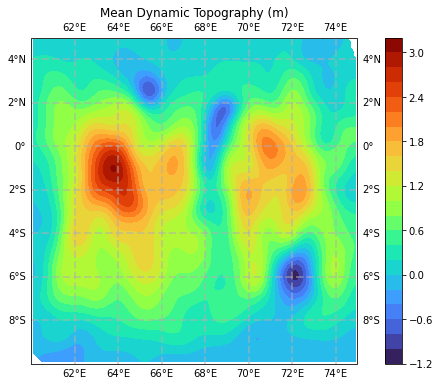

In [21]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')

plt.contourf(lons, lats, mdt_filtered, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('Mean Dynamic Topography (m)')
plt.show()

# Geostrophic current calculation

In [147]:
# Calculating gradients
lats1 = lats
lats1[100] = np.nan

mdt_diff_x = np.diff(mdt_filtered, axis=1)
mdt_diff_y = np.diff(mdt_filtered, axis=0)

dx = 0.1 * 11132.7 * np.ones(lats1.shape)
dy = 0.1 * 11132.7 * np.cos(lats1 * np.pi / 180)

In [148]:
# coriolis force
f = 2 * np.sin(lats1) * (7.292e-5)
g = 9.81 * np.ones(lats1.shape)

In [144]:
np.where(np.isnan(u))

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   2,
          2,   2,   2,   3,   3,   3,   4,   4,   5,   6,   7,   8,   9,
         10,  11,  12,  13,  14,  15,  16,  17,  18

In [149]:
u = (-1)*(g[:-1, :]/f[:-1, :])*(mdt_diff_y / dy[:-1,:]) *(1/1250)
v = (g[:, :-1]/f[:, :-1]) * (mdt_diff_x / dx[:, :-1]) * (1/1250)

In [150]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
grad = np.sqrt(v[:-1, :]**2 + u[:, :-1]**2)
plt.contourf(lons[:-1,:-1], lats[:-1,:-1], grad, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('Geostrophic currents (m/s)')
plt.show()

In [151]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
#grad = np.sqrt(v[1:, :]**2 + u[:, 1:]**2)
plt.contourf(X[:, :-1], Y[:,:-1], mdt_diff_x, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('x gradient')
plt.show()

In [152]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
#grad = np.sqrt(v[1:, :]**2 + u[:, 1:]**2)
plt.contourf(X[:-1, :], Y[:-1, :], mdt_diff_y, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('y gradient')
plt.show()

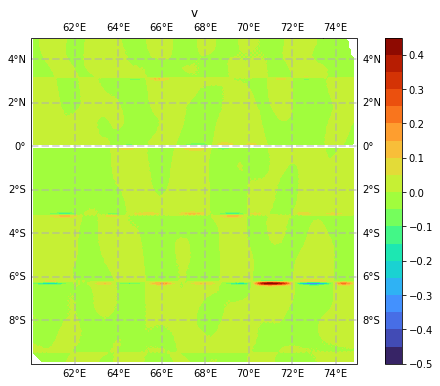

In [153]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
#grad = np.sqrt(v[1:, :]**2 + u[:, 1:]**2)
plt.contourf(X[:, :-1], Y[:,:-1], v, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('v')
plt.show()

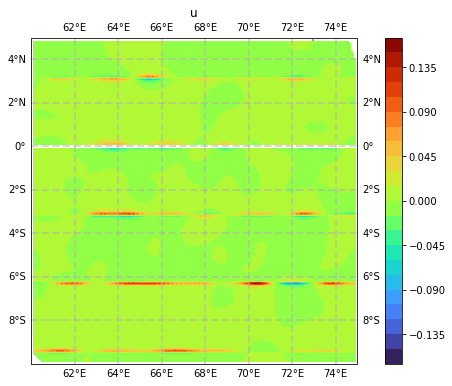

In [154]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,6))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
#grad = np.sqrt(v[1:, :]**2 + u[:, 1:]**2)
plt.contourf(X[:-1, :], Y[:-1,:], u, 20)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
cb = plt.colorbar()
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('u')
plt.show()

In [155]:
extent = [60, 75, -10, 5]
x = np.arange(extent[0], extent[1], 0.1)
y = np.arange(extent[2], extent[3], 0.1)
X, Y = np.meshgrid(x, y)

In [156]:
plt.streamplot(X[:-1,:-1], Y[:-1,:-1], u[:, :-1], v[:-1, :], density = 1)
plt.show()

In [157]:
plt.streamplot(X[1:,1:], Y[1:,1:], u[:, 1:], v[1:, :], density = 0.4)
plt.grid()
plt.show()

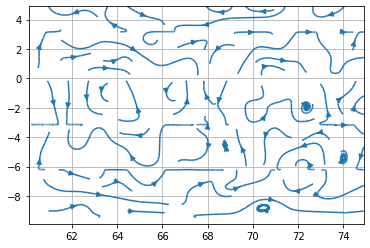

In [158]:
plt.streamplot(X[1:,1:], Y[1:,1:], u[:, 1:], v[1:, :], density = 0.6)
plt.grid()
plt.show()

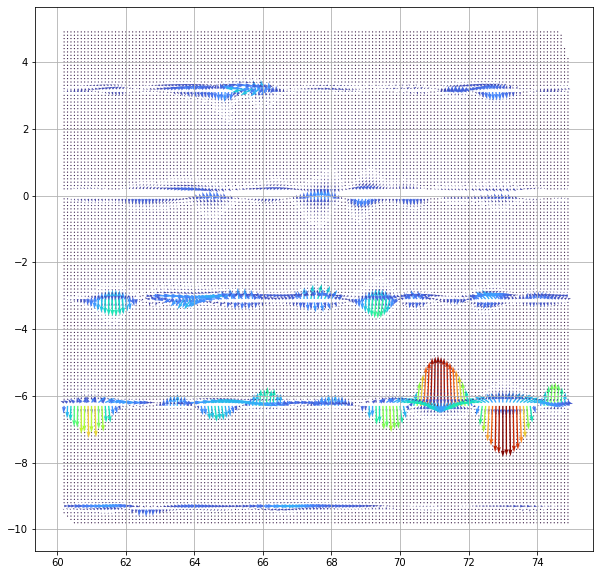

In [164]:
plt.figure(figsize=(10,10))
plt.quiver(X[1:,1:], Y[1:,1:], u[:, 1:], v[1:, :], np.sqrt(v[1:, :]**2 + u[:, 1:]**2), scale=5)

plt.grid()
plt.show()

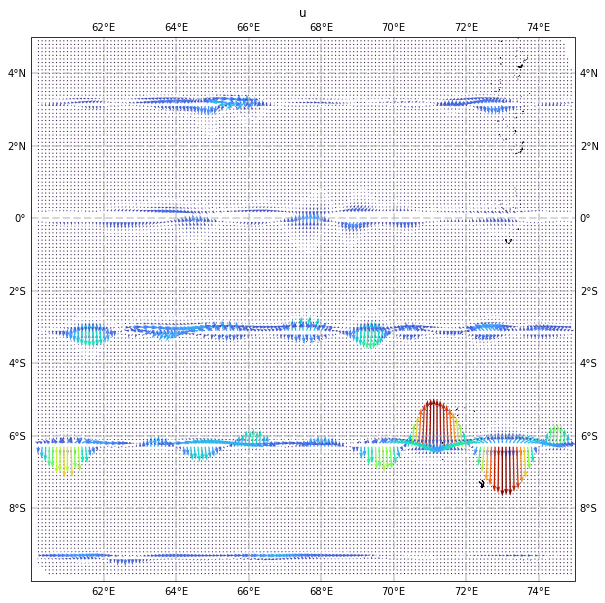

In [168]:
# Plotting the mdt on cartopy map
plt.figure(figsize=(10,10))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m')
#grad = np.sqrt(v[1:, :]**2 + u[:, 1:]**2)
ax.quiver(X[1:,1:], Y[1:,1:], u[:, 1:], v[1:, :], np.sqrt(v[1:, :]**2 + u[:, 1:]**2), scale=5)
ax.set_extent([60, 75,-10, 5], crs= ccrs.PlateCarree())
#cb = plt.colorbar(np.sqrt(v[1:, :]**2 + u[:, 1:]**2))
ax.gridlines(draw_labels=True, linewidth=2, alpha=0.5, linestyle='--')
plt.title('u')
plt.show()